# Методы градиентного спуска и Ньютона

## Олохтонова Мария
### НПМбд-01-19

In [20]:
import optimization
import oracles
import presubmit_tests as pt
import plot_trajectory_2d as pt2d
import matplotlib.pyplot as plt

import numpy as np
import scipy

# иначе при изменении файлов optmization.py и тд не применяются изменения
import importlib

In [22]:
importlib.reload(pt)
importlib.reload(oracles)
importlib.reload(optimization)
importlib.reload(pt2d)

pt.test_python3()
pt.test_QuadraticOracle()
pt.test_log_reg_usual()
pt.test_log_reg_oracle_calls()
pt.test_grad_finite_diff_1()
pt.test_grad_finite_diff_2()
pt.test_hess_finite_diff_1()
pt.test_hess_finite_diff_2()
pt.test_line_search()
pt.test_gd_basic()
pt.test_newton_basic()
pt.test_newton_1d()
pt.test_newton_fail()

Iteration 0: x_k = [1. 1.]
Iteration 0: x_k = [1. 1.]
Iteration 0: x_k = [1. 1.]
Iteration 0: x_k = [1. 1.]


Задание 3.5: Проверить правильность реализации подсчета градиента и гессиана логистического оракула с помощью реализованных функций. Для этого сгенерируйте небольшую модельную выборку
(матрицу A и вектор b) и сравните значения, выдаваемые методами grad и hess, с соответствующими
разностными аппроксимациями в нескольких пробных точках x

In [62]:
A = np.array([[6, 2], [-3, 4]])
b = np.array([6, 4])
oracle = oracles.create_log_reg_oracle(A, b, 2)

for x in np.array([[-1.5, 1.5], [2, -3], [6.5, -2]]):
    real_grad = oracle.grad(x)
    finite_grad = oracles.grad_finite_diff(oracle.func, x)    
    
    real_hess = oracle.hess(x)
    finite_hess = oracles.hess_finite_diff(oracle.func, x)
    
    print('x:', x)
    print('grad_err:', real_grad - finite_grad)
    print('hess_err:', real_hess - finite_hess)

x: [-1.5  1.5]
grad_err: [ 3.16462327e-07 -1.07050253e-07]
hess_err: [[-1.65480738e-07  1.39171370e-15]
 [ 1.39171370e-15  3.53616560e-05]]
x: [ 2. -3.]
grad_err: [ 5.93681758e-07 -2.62720279e-07]
hess_err: [[-3.56926175e-05  1.33226763e-15]
 [ 1.33226763e-15  3.53616560e-05]]
x: [ 6.5 -2. ]
grad_err: [ 1.98064663e-06 -1.84928649e-06]
hess_err: [[-3.56926175e-05  1.42108547e-04]
 [ 1.42108547e-04  1.06415930e-04]]


Покоординатная ошибка расчета гессиана и градиента не превышает $10^{-4}$

Задание 3.1 Проанализируйте траекторию градиентного спуска для нескольких квадратичных функций: придумайте две-три квадратичные двумерные функции, на которых работа метода будет отличаться, нарисуйте графики с линиями уровня функций и траекториями методов.

Число обусловленности: 6.364620573491261


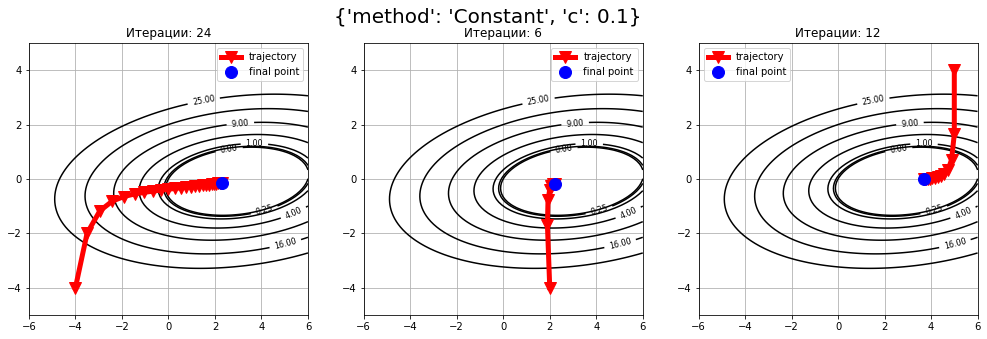

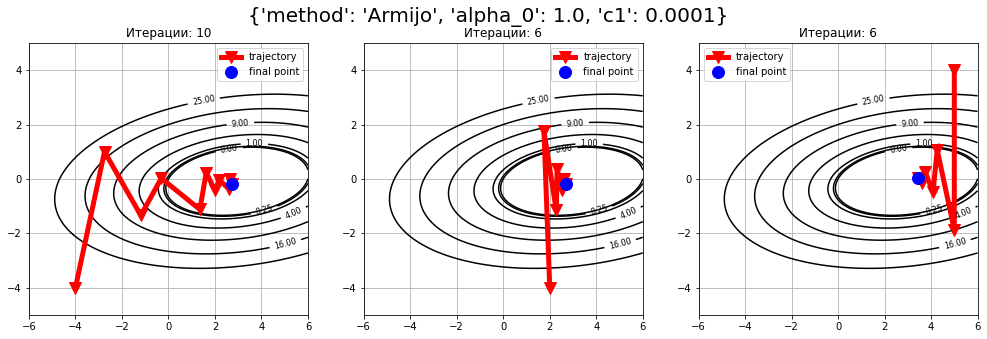

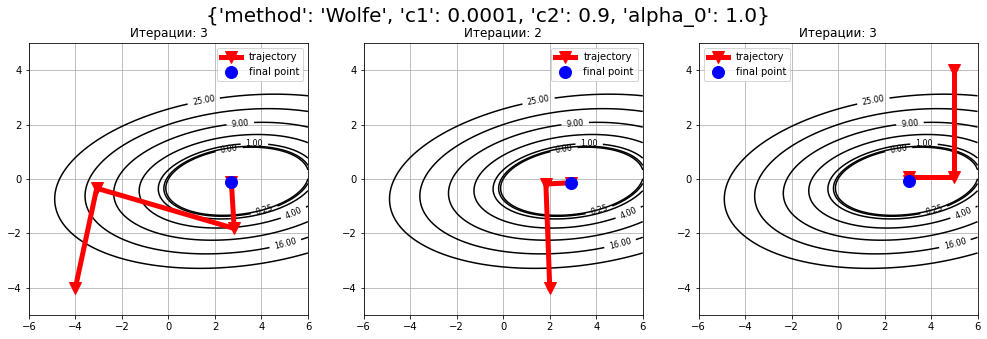

In [26]:
methods = [
    {'method': 'Constant', 'c': 0.1},
    {'method': 'Armijo', 'alpha_0': 1.0, 'c1': 1e-4},            
    {"method": 'Wolfe', 'c1': 1e-4, 'c2': 0.9, 'alpha_0': 1.0}
]

starts = np.array([[-4., -4.], [2., -4.], [5., 4.]])

A = np.array([
    [1., -0.5],
    [-0.5, 6.],
])

b = np.array([3., -2.])
oracle = oracles.QuadraticOracle(A, b)

print('Число обусловленности:', np.linalg.cond(A))

for i, m in enumerate(methods):
    fig, ax = plt.subplots(1, len(methods), figsize=(17, 5))
    fig.suptitle(str(m), fontsize=20)
    for j, x0 in enumerate(starts):
        [x_star, message, history] = optimization.gradient_descent(oracle, x0, tolerance=0.001, max_iter=100, line_search_options=m, trace=True)
        pt2d.plot_levels(oracle.func, ax[j])
        pt2d.plot_trajectory(oracle.func, ax[j], history['x'])
        ax[j].set_title('Итерации: ' + str(len(history['x']) - 1))
        ax[j].legend()

x_ref [1.99949975e+00 5.00250125e-04]
y_ref 2.0002501250625313
Число обусловленности: 2001.0015012507504
x_gd [6.25018556e+08 1.24941241e+12]
x_gd [6.24549971e+08 1.24847570e+12]
x_gd [3.13883808e+06 6.27453096e+09]
x_gd [-3.99380364 -0.84367687]
x_gd [ 2.00157584 -0.84604092]
x_gd [4.99611352 0.84564728]
x_gd [-3.98818602 -0.11558814]
x_gd [ 2.00193761 -0.11849542]
x_gd [4.99312305 0.11801204]


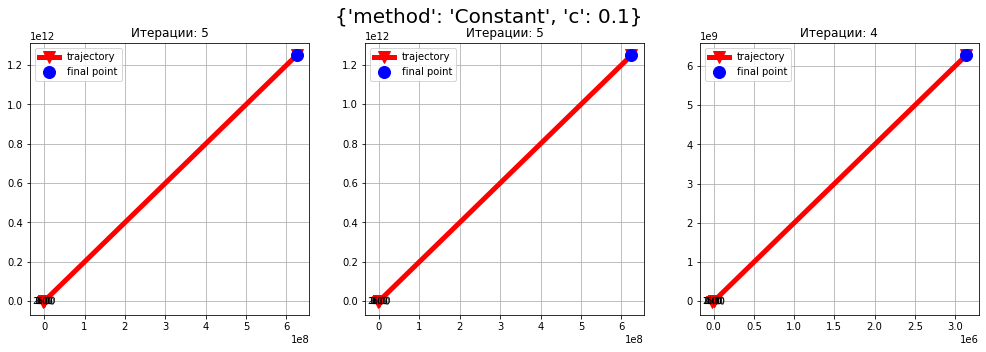

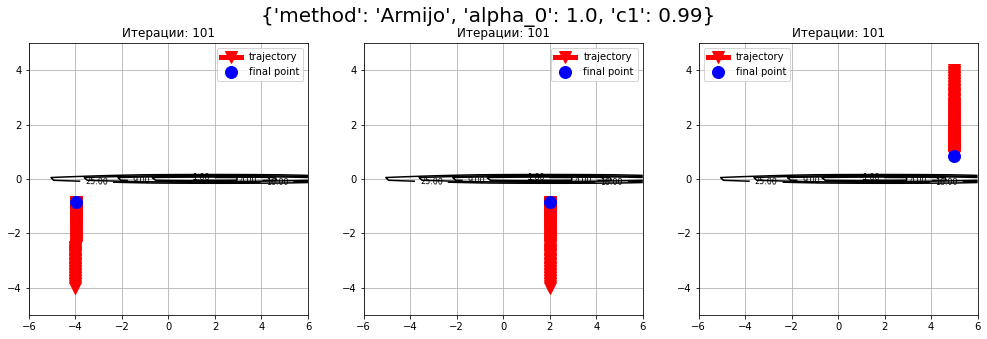

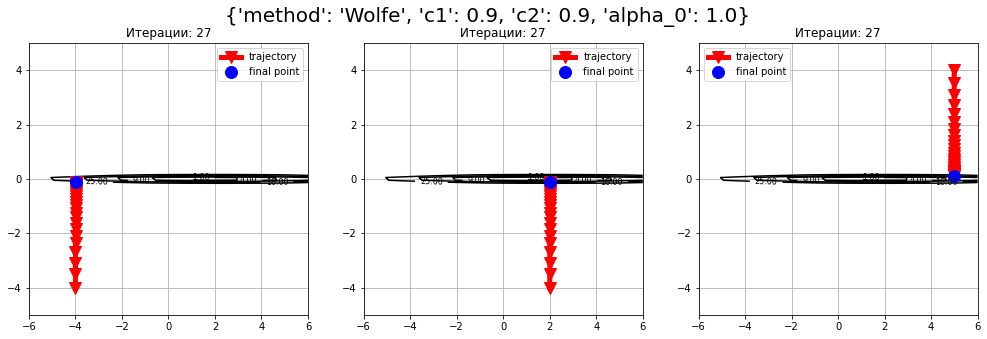

In [31]:
methods = [
    {'method': 'Constant', 'c': 0.1},
    {'method': 'Armijo', 'alpha_0': 1.0, 'c1': 0.99},            
    {"method": 'Wolfe', 'c1': 0.9, 'c2': 0.9, 'alpha_0': 1.0}
]

starts = np.array([[-4., -4.], [2., -4.], [5., 4.]])

A = np.array([
    [1, 1],
    [1, 2000],
])

b = np.array([2.0, 3.0])
oracle = oracles.QuadraticOracle(A, b)
#1/2 * x^2 + 1000*y^2 - 2*x - 3*y + x*y
print('x_ref', np.array([1.9994997498749374, 0.0005002501250625312]))
print('y_ref', 2.0002501250625313)

print('Число обусловленности:', np.linalg.cond(A))

for i, m in enumerate(methods):
    fig, ax = plt.subplots(1, len(methods), figsize=(17, 5))
    fig.suptitle(str(m), fontsize=20)
    for j, x0 in enumerate(starts):
        [x_star, message, history] = optimization.gradient_descent(oracle, x0, tolerance=0.001, max_iter=100, line_search_options=m, trace=True)
        pt2d.plot_levels(oracle.func, ax[j])
        pt2d.plot_trajectory(oracle.func, ax[j], history['x'])
        ax[j].set_title('Итерации: ' + str(len(history['x']) - 1))
        #print(oracle.func(x_star))
        print('x_gd', x_star)
        ax[j].legend()

Градиентный спуск на хорошо обусловленной матрице сошелся, а на плохо - нет. Выбор начальной точки не влияет на сходимость, но влияет на кол-во итераций. Более сложные стартегии (Вульф, Армихо) привели к сходимости за меньшее кол-во шагов, чем константная стратегия.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


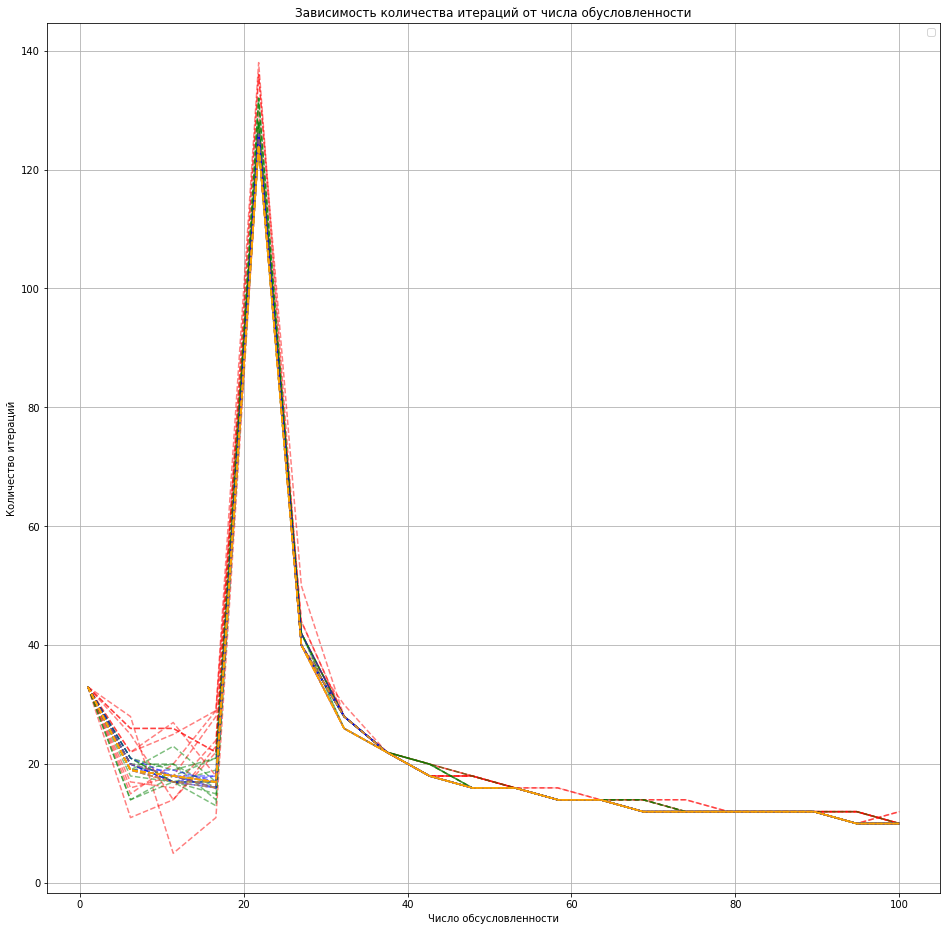

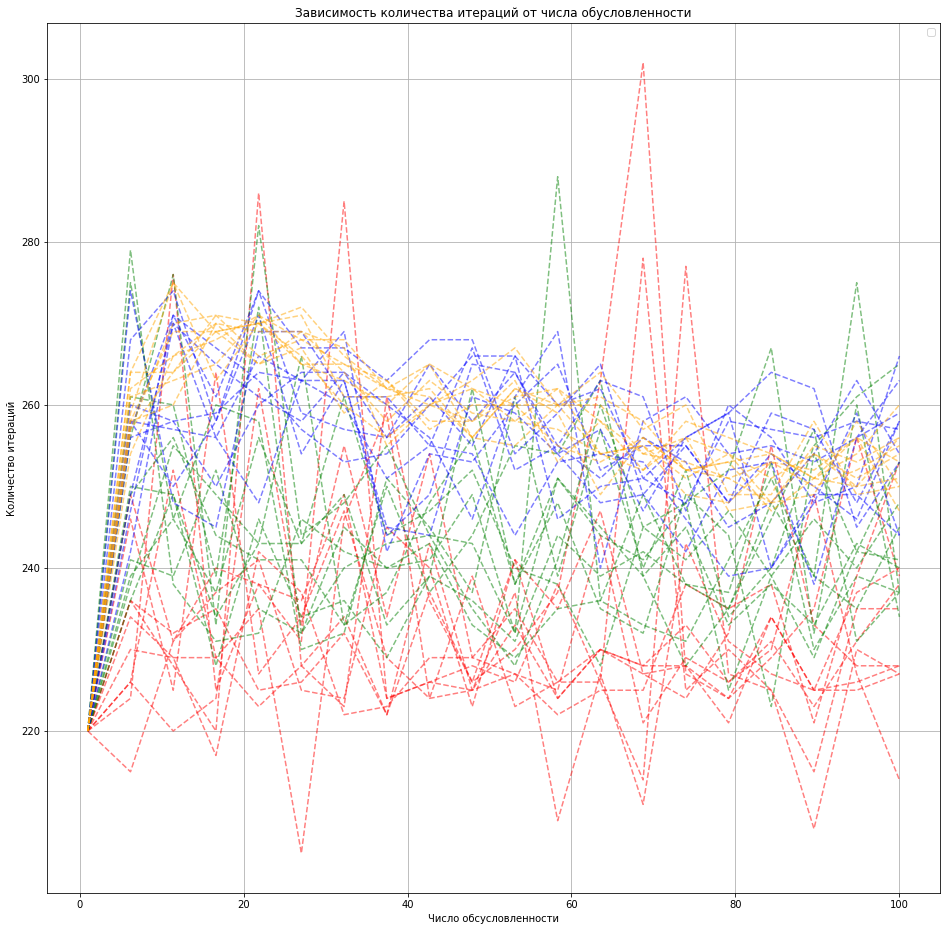

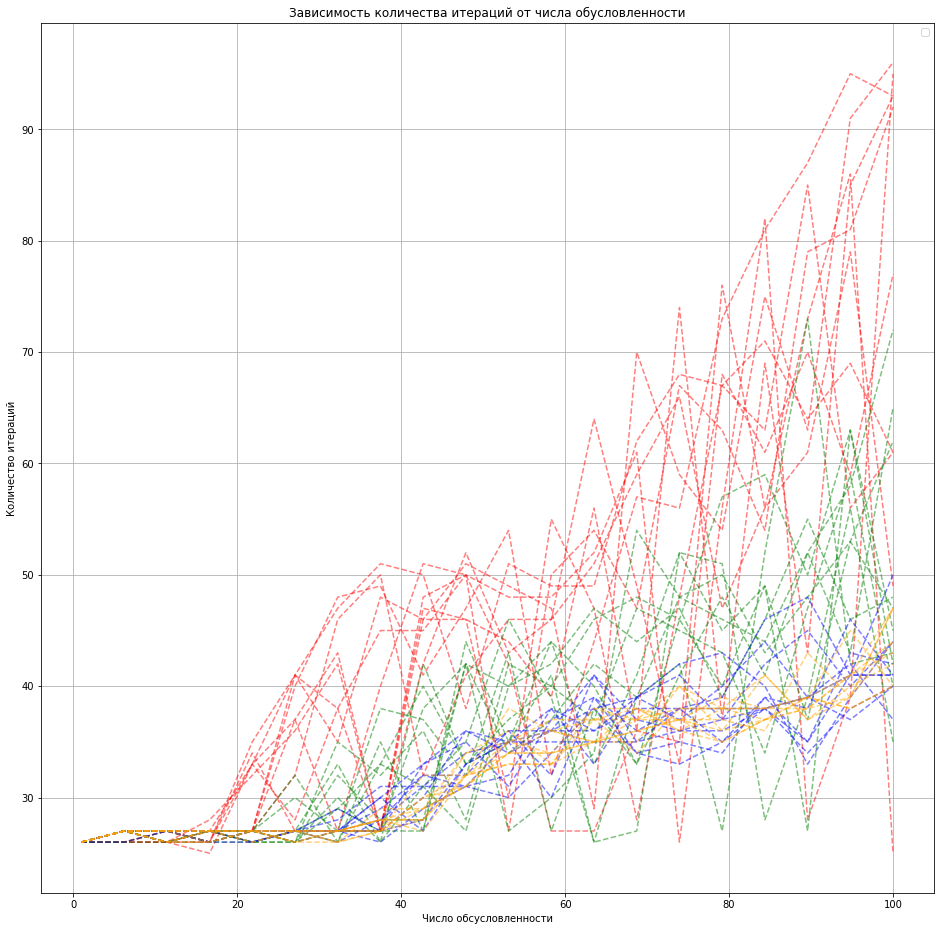

In [6]:
np.random.seed(323)

methods = [
    {'method': 'Constant', 'c': 0.1},
    {'method': 'Armijo', 'alpha_0': 1.0, 'c1': 0.99},            
    {"method": 'Wolfe', 'c1': 0.9, 'c2': 0.9, 'alpha_0': 1.0}
]
xs = []
ys = []

colors = ['red', 'green', 'blue', 'orange']
for m in methods:
    fig, ax = plt.subplots(1, 1, figsize=(16, 16))

    for i in range(1, 5):
        n = 10**i

        for _ in range(10):
            for k in np.linspace(1, 100, num=20): # число обсусловленности    
                d = np.random.rand(n)
                d[0] = 0
                d[-1] = 1.0
                d = 1 + d * (k - 1)    
                A = scipy.sparse.diags(d)    
                b = np.random.rand(n)*k
                x0 = np.ones(n)
                oracle = oracles.QuadraticOracle(A, b)    
                [_, status, history] = optimization.gradient_descent(oracle, x0, tolerance=0.001, max_iter=1000, line_search_options=m, trace=True)
                iterations = len(history['time']) - 1
                xs.append(k)
                ys.append(iterations)    

            ax.plot(xs, ys, linestyle='dashed', alpha=0.5, color=colors[i - 1])
            xs = []
            ys = []

    ax.set_title('Зависимость количества итераций от числа обусловленности')
    ax.set_xlabel('Число обсусловленности')
    ax.set_ylabel('Количество итераций')
    ax.legend()
    ax.grid()

Для трех стратегий выбора шага получились разные зависимости.

При константной стратегии не видно зависимости от размерности задачи, а также не наблюдается различий между повторными запусками спуска. Зависимость от числа обусловленности очень слабая.

При стратегии Армихо график получился очень шумным, однако в среднем задачи более высоких размерностей требуют больше итераций. Зависимость от числа обусловленности не просматривается.

При стратегии Вульфа видна зависимость от числа обусловленности: при большем ч.о. для сходимости требуется больше итераций. Задачии более высокой размерности в среднем не требуют большего числа итераций, и их графики менее шумные, чем у задач низкой размерности.

Задание 3.3: Сравнить методы градиентного спуска и Ньютона на задаче обучения логистической регрессии нареальных данных.
В качестве реальных данных используйте следующие три набора с сайта LIBSVM3 : w8a, gisette и real-sim. Коэффициент регуляризации взять стандартным образом: $\lambda = \frac{1}{m}$.

Параметры обоих методов взять равными параметрам по умолчанию. 

Начальную точку выбрать $x_0 = 0$.


Построить графики сходимости следующих двух видов:
* Зависимость значения функции от реального времени работы метода.
* Зависимость относительного квадрата нормы градиента $|| \nabla f(x_k) ||^2_2 ~~/~~ || \nabla f(x_0) ||^2_2$ (в логарифмической шкале) против реального времени работы.

In [7]:
from sklearn.datasets import load_svmlight_file


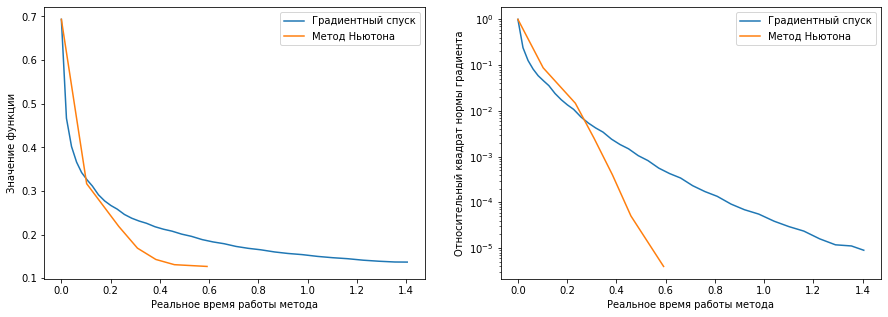

In [247]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
X, y = load_svmlight_file('w8a.txt')
oracle = oracles.create_log_reg_oracle(X, y, 1.0 / len(y))
    
_, _, history_gd = optimization.gradient_descent(oracle, np.zeros(X.shape[1]), trace=True)
ax[0].plot(history_gd['time'], history_gd['func'], label='Градиентный спуск')

_, _, history_n = optimization.newton(oracle, np.zeros(X.shape[1]), trace=True)
ax[0].plot(history_n['time'], history_n['func'], label='Метод Ньютона')
ax[0].set_xlabel('Реальное время работы метода')
ax[0].set_ylabel('Значение функции')
ax[0].legend()

ax[1].plot(history_gd['time'], np.array(history_gd['grad_norm']) ** 2 / history_gd['grad_norm'][0] ** 2, label="Градиентный спуск")
ax[1].plot(history_n['time'], np.array(history_n['grad_norm']) ** 2 / history_n['grad_norm'][0] ** 2, label="Метод Ньютона")

ax[1].set_yscale('log')
ax[1].set_xlabel('Реальное время работы метода')
ax[1].set_ylabel('Относительный квадрат нормы градиента')
ax[1].legend()

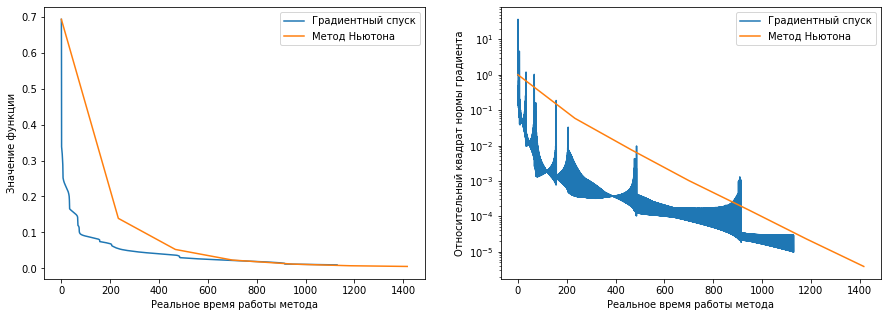

In [248]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
X, y = load_svmlight_file('gisette_scale.bz2')
oracle = oracles.create_log_reg_oracle(X, y, 1.0 / len(y))
    
_, _, history_gd = optimization.gradient_descent(oracle, np.zeros(X.shape[1]), trace=True)
ax[0].plot(history_gd['time'], history_gd['func'], label='Градиентный спуск')

_, _, history_n = optimization.newton(oracle, np.zeros(X.shape[1]), trace=True)
ax[0].plot(history_n['time'], history_n['func'], label='Метод Ньютона')
ax[0].set_xlabel('Реальное время работы метода')
ax[0].set_ylabel('Значение функции')
ax[0].legend()

ax[1].plot(history_gd['time'], np.array(history_gd['grad_norm']) ** 2 / history_gd['grad_norm'][0] ** 2, label="Градиентный спуск")
ax[1].plot(history_n['time'], np.array(history_n['grad_norm']) ** 2 / history_n['grad_norm'][0] ** 2, label="Метод Ньютона")

ax[1].set_yscale('log')
ax[1].set_xlabel('Реальное время работы метода')
ax[1].set_ylabel('Относительный квадрат нормы градиента')
ax[1].legend()

На наборе данных w8a градиентный спуск быстрее сходится на начальных итерациях, но в итоге метод Ньютона сходится быстрее. 

На наборе данных gisette_scale градиентный спуск сходится быстрее. Метрика из п. (б) при градиентном спуске очень сильно скачет. Скорее всего, это означает, что градиентный спуск долго не может найти окрестность минимума.